
A few years ago, a discrimination lawsuit was filed against the California DDS claiming that White Non-Hispanics were receiving more funding than Hispanics. If this was true, the DDS faced some serious implications. In order to investigate the issue, several statisticians were hired to further analyze the data.

After viewing the summary, this sample of 1000 individuals seems like a good representation of the state of California as a whole. The ages look to be semi-uniformly distributed, and the ethnicity frequencies seem to accurately represent the demographic proportions in the state.

Now, we are interested in determining if there is any ethnic bias regarding the expenditures. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


url='https://raw.githubusercontent.com/KaonToPion/datasets/main/californiaDDSDataV2.csv'
df=pd.read_csv(url)

In [2]:
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [3]:
df['Ethnicity'].unique()

array(['White not Hispanic', 'Hispanic', 'Black', 'Multi Race', 'Asian',
       'American Indian', 'Other', 'Native Hawaiian'], dtype=object)

<AxesSubplot:xlabel='Ethnicity', ylabel='Expenditures'>

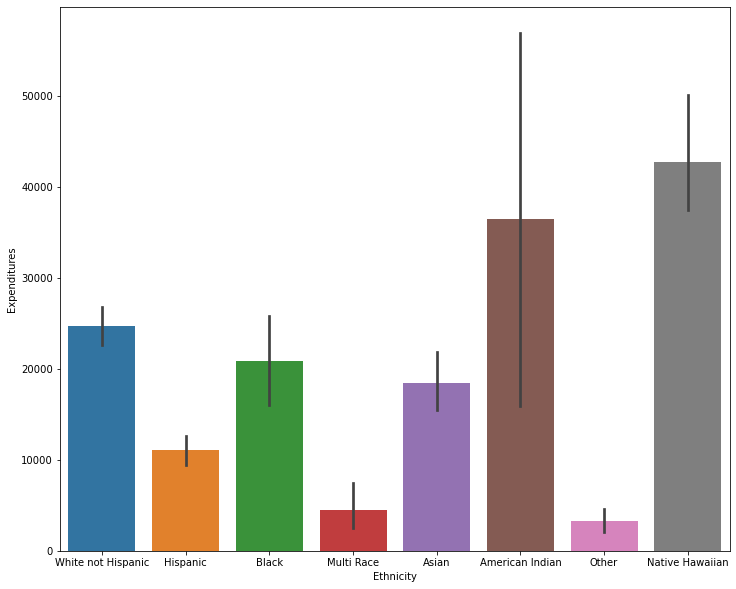

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df, x='Ethnicity', y='Expenditures')

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

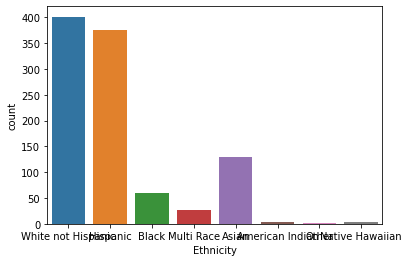

In [11]:
sns.countplot(data=df, x='Ethnicity')

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


<AxesSubplot:xlabel='Age', ylabel='Expenditures'>

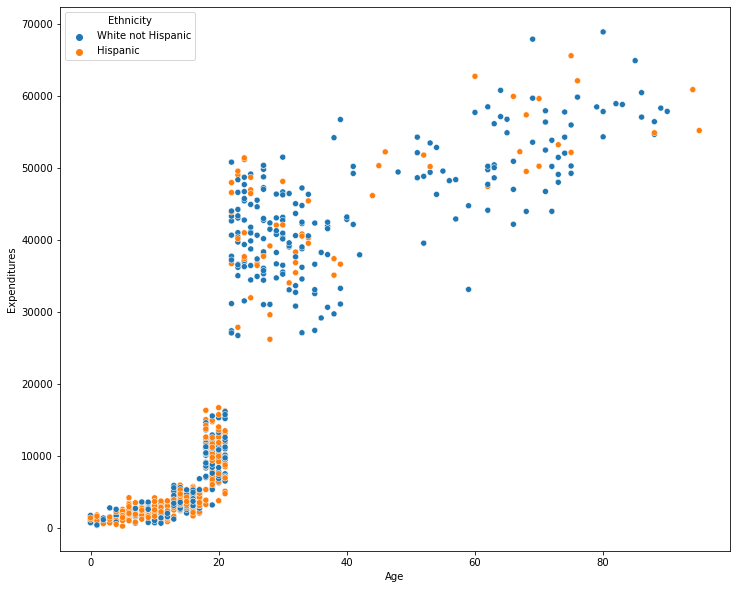

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df[df['Ethnicity'].str.contains('(White not Hispanic|Hispanic)')], x='Age', y='Expenditures', hue='Ethnicity')

In [37]:
df_new = df[df['Ethnicity'].str.contains('(White not Hispanic|Hispanic)')].copy()
df_young = df_new[df_new['Age']<=17]
df_young_adult = df_new[(df_new['Age']>17)&(df_new['Age']<=21)]
df_old = df_new[df_new['Age']>21]

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
<ipython-input-37-528724c62dbf>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_young = df_new[df['Age']<=17]
<ipython-input-37-528724c62dbf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_young_adult = df_new[(df['Age']>17)&(df['Age']<=21)]
<ipython-input-37-528724c62dbf>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_old = df_new[df['Age']>21]


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Age', ylabel='Expenditures'>

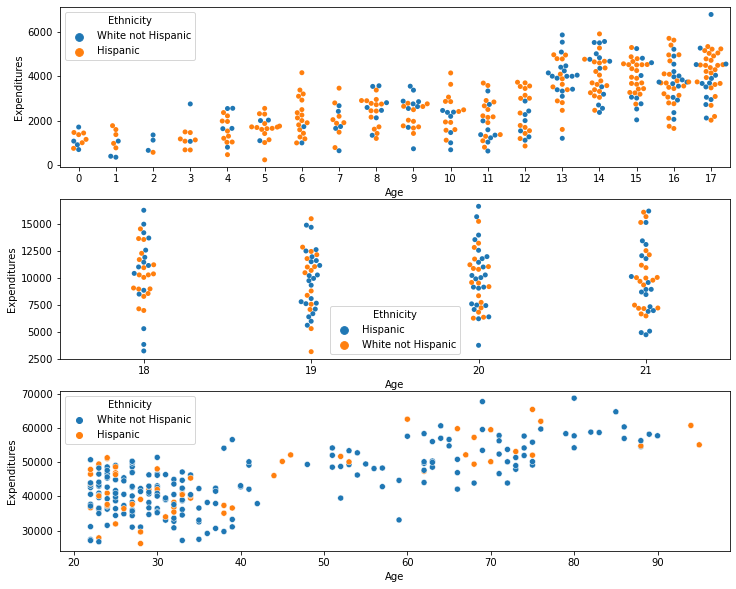

In [43]:
fig, ax = plt.subplots(3, figsize=(12, 10))
sns.swarmplot(data=df_young, x='Age', y='Expenditures', hue='Ethnicity', ax=ax[0])
sns.swarmplot(data=df_young_adult, x='Age', y='Expenditures', hue='Ethnicity', ax=ax[1])
sns.scatterplot(data=df_old, x='Age', y='Expenditures', hue='Ethnicity', ax=ax[2])

<AxesSubplot:xlabel='Ethnicity', ylabel='Expenditures'>

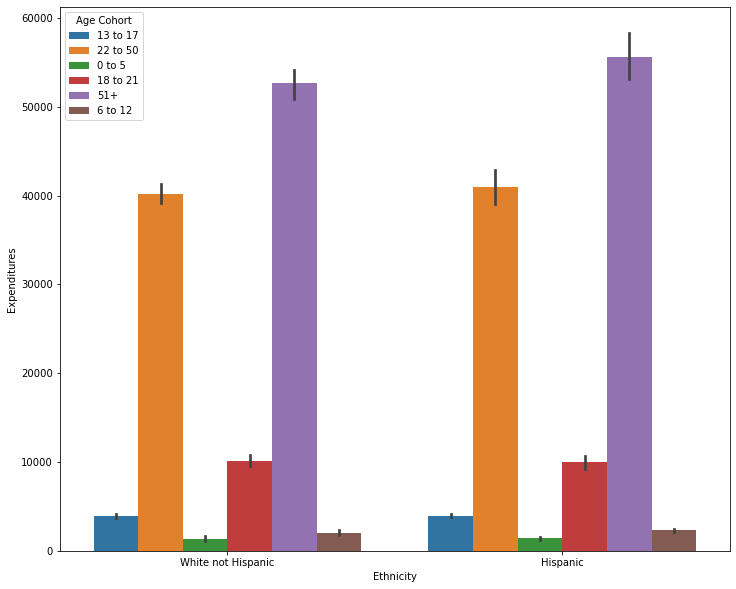

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df_new, x='Ethnicity', y='Expenditures', hue='Age Cohort')

Text(0.5, 1.0, 'OLD')

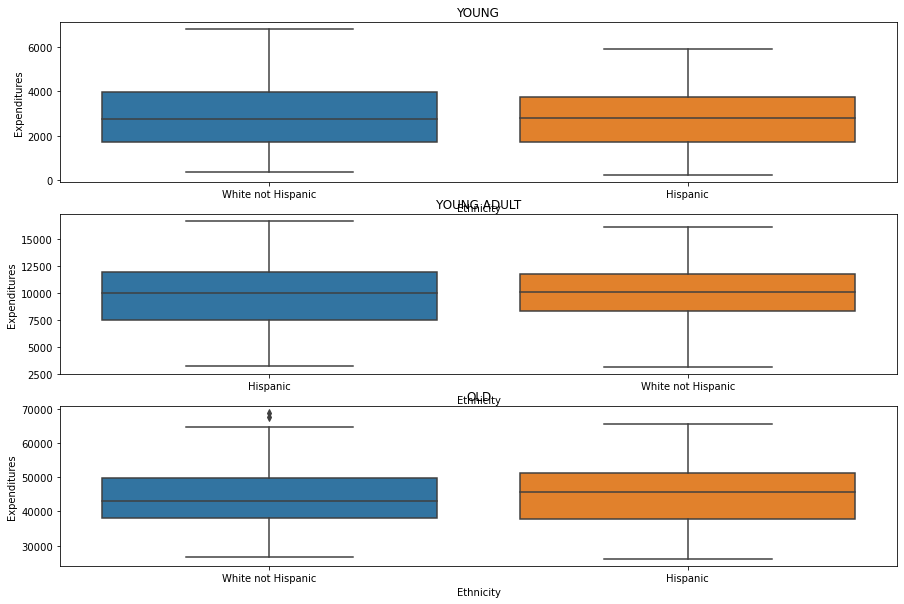

In [62]:
fig, ax = plt.subplots(3, figsize=(15, 10))
sns.boxplot(data=df_young, x='Ethnicity', y='Expenditures', ax=ax[0])
sns.boxplot(data=df_young_adult, x='Ethnicity', y='Expenditures', ax=ax[1])
sns.boxplot(data=df_old, x='Ethnicity', y='Expenditures', ax=ax[2])
ax[0].set_title('YOUNG')
ax[1].set_title('YOUNG ADULT')
ax[2].set_title('OLD')

<AxesSubplot:xlabel='Age Cohort', ylabel='Expenditures'>

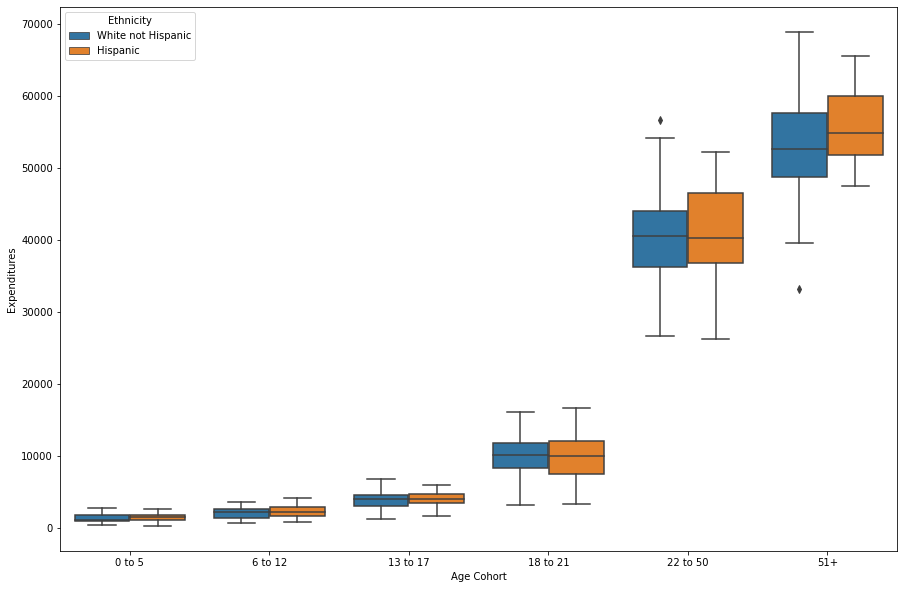

In [77]:
fig, ax = plt.subplots(figsize=(15, 10))
my_order = df_new[['Age Cohort','Age']].sort_values(by='Age')
my_order = my_order['Age Cohort'].unique()
my_order
sns.boxplot(data=df_new, x='Age Cohort', y='Expenditures', hue='Ethnicity', ax=ax, order=my_order)
#